In [1]:
# Import required pacakages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import altair as alt
from vega_datasets import data

# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable("data_server");

In [2]:
processed_path = os.path.join(os.pardir, "data", "processed", "stinson2019")
norm_path = os.path.join(processed_path, "norm_tables")
derived_path = os.path.join(processed_path, "derived_tables")

# Sap Measurement Data Exploration


In [3]:
# Load full sap measurement tables
sap_df = pd.read_pickle(os.path.join(processed_path, 'stinson2019_df'))

In [4]:
sap_df.head()

,site,date,tree,species,tap,sugar,sap_wt,year,site_id,tree_id,tree_record_id,tap_record_id
0,Harvard Forest,2012-02-16,HF1,ACSA,A,2.7,4.24,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-16,HF.ACSA.HF1.A.2012-02-16
1,Harvard Forest,2012-02-16,HF1,ACSA,B,2.4,1.08,2012-01-01,HF,HF.ACSA.HF1,HF.ACSA.HF1.2012-02-16,HF.ACSA.HF1.B.2012-02-16
2,Harvard Forest,2012-02-16,HF4,ACSA,A,2.1,2.32,2012-01-01,HF,HF.ACSA.HF4,HF.ACSA.HF4.2012-02-16,HF.ACSA.HF4.A.2012-02-16
3,Harvard Forest,2012-02-16,HF4,ACSA,B,2.4,1.48,2012-01-01,HF,HF.ACSA.HF4,HF.ACSA.HF4.2012-02-16,HF.ACSA.HF4.B.2012-02-16
4,Harvard Forest,2012-02-16,HF6,ACSA,A,2.6,1.84,2012-01-01,HF,HF.ACSA.HF6,HF.ACSA.HF6.2012-02-16,HF.ACSA.HF6.A.2012-02-16


In [5]:
sap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9929 entries, 0 to 9928
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   site            9929 non-null   object        
 1   date            9929 non-null   datetime64[ns]
 2   tree            9929 non-null   object        
 3   species         9929 non-null   object        
 4   tap             9929 non-null   object        
 5   sugar           8139 non-null   float64       
 6   sap_wt          9296 non-null   float64       
 7   year            9929 non-null   datetime64[ns]
 8   site_id         9929 non-null   object        
 9   tree_id         9929 non-null   object        
 10  tree_record_id  9929 non-null   object        
 11  tap_record_id   9929 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 931.0+ KB


In [6]:
sap_df.describe(include='all', datetime_is_numeric=True)

,site,date,tree,species,tap,sugar,sap_wt,year,site_id,tree_id,tree_record_id,tap_record_id
count,9929,9929,9929,9929,9929,8139.000000,9296.000000,9929,9929,9929,9929,9929
unique,6,NaN,199,2,3,NaN,NaN,NaN,6,199,6799,9923
top,Harvard Forest,NaN,HF4,ACSA,A,NaN,NaN,NaN,HF,HF.ACSA.HF43,SMM.ACSA.SM10.2015-03-19,DR.ACRU.RM18.A.2016-02-20
freq,5299,NaN,266,8425,6800,NaN,NaN,NaN,5299,266,3,2
mean,NaN,2015-06-20 19:29:39.877127936,NaN,NaN,NaN,2.452807,2.953028,2015-04-05 16:11:50.645583616,NaN,NaN,NaN,NaN
min,NaN,2012-02-16 00:00:00,NaN,NaN,NaN,0.000000,0.010000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN
25%,NaN,2014-04-02 00:00:00,NaN,NaN,NaN,2.000000,0.630000,2014-01-01 00:00:00,NaN,NaN,NaN,NaN
50%,NaN,2016-02-07 00:00:00,NaN,NaN,NaN,2.400000,1.920000,2016-01-01 00:00:00,NaN,NaN,NaN,NaN
75%,NaN,2016-04-21 00:00:00,NaN,NaN,NaN,2.900000,4.102500,2016-01-01 00:00:00,NaN,NaN,NaN,NaN
max,NaN,2017-05-04 00:00:00,NaN,NaN,NaN,7.300000,30.120000,2017-01-01 00:00:00,NaN,NaN,NaN,NaN


In [31]:
sap_df[['site', 'year']].value_counts(sort=False)

site                     year      
Dartmouth Organic Farm   2014-01-01     414
                         2015-01-01     357
                         2016-01-01     735
                         2017-01-01     432
Divide Ridge             2016-01-01     224
                         2017-01-01     145
Harvard Forest           2012-01-01     391
                         2013-01-01    1116
                         2014-01-01     756
                         2015-01-01     816
                         2016-01-01    1176
                         2017-01-01    1044
INDU                     2016-01-01     115
                         2017-01-01     325
Northern range - Quebec  2014-01-01     180
                         2015-01-01     240
                         2016-01-01     360
                         2017-01-01     330
Southernmost Maple       2014-01-01     264
                         2015-01-01     174
                         2016-01-01     243
                         2017-01-01     

## Sap weight and sap sugar percentage

### Mean sap at each site averaged over all years and all taps

In [7]:
sap_site_date = sap_df.groupby(['site','date']).mean().reset_index()
sap_site_date['doy'] = pd.DatetimeIndex(sap_site_date.date).dayofyear
sap_site_date['year'] = pd.DatetimeIndex(sap_site_date.date).year
sap_site_date

,site,date,sugar,sap_wt,doy,year
0,Dartmouth Organic Farm,2014-03-11,1.875000,0.115556,70,2014
1,Dartmouth Organic Farm,2014-03-17,2.111111,0.252609,76,2014
2,Dartmouth Organic Farm,2014-03-30,2.242105,0.437368,89,2014
3,Dartmouth Organic Farm,2014-03-31,2.042857,0.748696,90,2014
4,Dartmouth Organic Farm,2014-04-01,2.122727,2.150909,91,2014
...,...,...,...,...,...,...
298,Southernmost Maple,2016-03-08,1.873077,13.249259,68,2016
299,Southernmost Maple,2017-02-18,1.700000,15.677000,49,2017
300,Southernmost Maple,2017-02-20,1.794444,1.931364,51,2017
301,Southernmost Maple,2017-02-28,1.846154,2.085909,59,2017


In [27]:
full_sugar_plt = alt.Chart(sap_site_date).mark_circle().encode(
    x = alt.X('doy', title='Day of year'),
    y = alt.Y('sugar', title = 'Sugar Content (% by weight)')
).facet(
    'site', columns = 3
)
full_sugar_plt

alt.FacetChart(...)

In [26]:
full_sap_plt = alt.Chart(sap_site_date).mark_circle().encode(
    x = alt.X('doy', title='Day of year'),
    y = alt.Y('sap_wt', title = 'Collected sap weight (kg)')
).facet(
    'site', columns = 3
)
full_sap_plt

alt.FacetChart(...)

### Correlations between sugar content, sap weight, day of year, and year

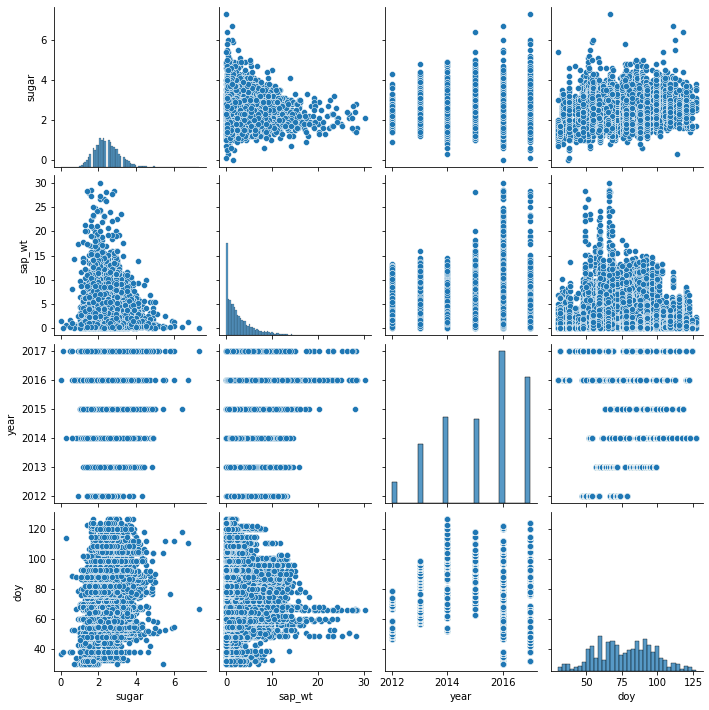

In [10]:
corr_df = sap_df.copy()
corr_df['doy'] = pd.DatetimeIndex(corr_df.date).dayofyear
corr_df['year'] = pd.DatetimeIndex(corr_df.date).year

sns.pairplot(corr_df);

# Processed data exploration

In [11]:
# Load information on sap measurement sites
norm = dict()
for file in os.listdir(norm_path):
    norm[file] = pd.read_pickle(os.path.join(norm_path, file))

# Load derived sap measurement data
sap_sugar_df = pd.read_pickle(os.path.join(derived_path, 'sap_sugar_weekly_summary'))
full_weekly_df = pd.read_pickle(os.path.join(derived_path, 'full_weekly_summary'))

# Load freeze/thaw and growing degree data for a given weather station and associate with a sap measurement site
gdd_frthw = pd.read_pickle(os.path.join(derived_path,'gdd_frthw'))
closest_weather_stn = pd.read_pickle(os.path.join(norm_path, 'closest_weather_stn'))
gdd_frthw = gdd_frthw.merge(closest_weather_stn.reset_index(), how = 'left', on= 'stn_id')
gdd_frthw = gdd_frthw.set_index('datetime')


In [12]:
full_weekly_df

,date,tap_id,tree,sap,sugar,year,sugarwt,cum_sap,cum_sugarwt,weekly_sap,weekly_sugarwt,cum_syrupLitres,weekly_syrupLitres,date_from,date_to,jd_from,jd_to,site
0,2014-03-11,DOF1A,DOF1,0.03,1.2,2014,0.00036,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-05,2014-03-11,64,70,DOF
1,2014-03-12,DOF1A,DOF1,NaN,NaN,2014,NaN,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-06,2014-03-12,65,71,DOF
2,2014-03-13,DOF1A,DOF1,NaN,NaN,2014,NaN,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-07,2014-03-13,66,72,DOF
3,2014-03-14,DOF1A,DOF1,NaN,NaN,2014,NaN,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-08,2014-03-14,67,73,DOF
4,2014-03-15,DOF1A,DOF1,NaN,NaN,2014,NaN,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-09,2014-03-15,68,74,DOF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21570,2016-03-04,SMAS8B,SMAS8,NaN,NaN,2016,NaN,51.95,1.09487,34.63,0.73113,0.823211,0.549722,2016-02-27,2016-03-04,58,64,SMM
21571,2016-03-05,SMAS8B,SMAS8,NaN,NaN,2016,NaN,51.95,1.09487,34.63,0.73113,0.823211,0.549722,2016-02-28,2016-03-05,59,65,SMM
21572,2016-03-06,SMAS8B,SMAS8,17.01,1.8,2016,0.30618,68.96,1.40105,36.53,0.72000,1.053421,0.541353,2016-02-29,2016-03-06,60,66,SMM
21573,2016-03-07,SMAS8B,SMAS8,NaN,NaN,2016,NaN,68.96,1.40105,27.42,0.55602,1.053421,0.418060,2016-03-01,2016-03-07,61,67,SMM


In [22]:
# Look at a particular tap over all years
tap = 'HF22A'
alt.Chart(full_weekly_df[full_weekly_df.tap_id == tap]).mark_line().encode(
    x = alt.X('jd_to', title = 'Day of year'),
    y = alt.Y('cum_syrupLitres', title = 'Cumulative litres of syrup'),
    color = alt.Color('year:N', title = 'Year')
)

alt.Chart(...)

In [21]:
site_jd_summary = full_weekly_df.groupby(['site', 'jd_to']).median().reset_index()
alt.Chart(site_jd_summary).mark_line().encode(
    x = alt.X('jd_to', title = 'Day of year'),
    y = alt.Y('cum_syrupLitres', title = 'Cumulative litres of syrup'),
    color = alt.Color('site:N', title = 'Site')
)

alt.Chart(...)

In [14]:
## TODO ## Add gdd, frthw, mean airtemp, max/min airtemps to full_weekly_df & plot correlations

In [59]:
sap_sugar_df

,tap_id,date_from,date_to,weekly_sugarwt,weekly_sap,site
0,DOF1A,2014-03-05,2014-03-11,0.00036,0.03,DOF
1,DOF1A,2014-03-06,2014-03-12,0.00036,0.03,DOF
2,DOF1A,2014-03-07,2014-03-13,0.00036,0.03,DOF
3,DOF1A,2014-03-08,2014-03-14,0.00036,0.03,DOF
4,DOF1A,2014-03-09,2014-03-15,0.00036,0.03,DOF
...,...,...,...,...,...,...
21570,SMAS8B,2016-02-27,2016-03-04,0.73113,34.63,SMM
21571,SMAS8B,2016-02-28,2016-03-05,0.73113,34.63,SMM
21572,SMAS8B,2016-02-29,2016-03-06,0.72000,36.53,SMM
21573,SMAS8B,2016-03-01,2016-03-07,0.55602,27.42,SMM


In [58]:
full_weekly_df

,date,tap_id,tree,sap,sugar,year,sugarwt,cum_sap,cum_sugarwt,weekly_sap,weekly_sugarwt,cum_syrupLitres,weekly_syrupLitres,date_from,date_to,jd_from,jd_to,site
0,2014-03-11,DOF1A,DOF1,0.03,1.2,2014,0.00036,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-05,2014-03-11,64,70,DOF
1,2014-03-12,DOF1A,DOF1,NaN,NaN,2014,NaN,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-06,2014-03-12,65,71,DOF
2,2014-03-13,DOF1A,DOF1,NaN,NaN,2014,NaN,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-07,2014-03-13,66,72,DOF
3,2014-03-14,DOF1A,DOF1,NaN,NaN,2014,NaN,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-08,2014-03-14,67,73,DOF
4,2014-03-15,DOF1A,DOF1,NaN,NaN,2014,NaN,0.03,0.00036,0.03,0.00036,0.000271,0.000271,2014-03-09,2014-03-15,68,74,DOF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21570,2016-03-04,SMAS8B,SMAS8,NaN,NaN,2016,NaN,51.95,1.09487,34.63,0.73113,0.823211,0.549722,2016-02-27,2016-03-04,58,64,SMM
21571,2016-03-05,SMAS8B,SMAS8,NaN,NaN,2016,NaN,51.95,1.09487,34.63,0.73113,0.823211,0.549722,2016-02-28,2016-03-05,59,65,SMM
21572,2016-03-06,SMAS8B,SMAS8,17.01,1.8,2016,0.30618,68.96,1.40105,36.53,0.72000,1.053421,0.541353,2016-02-29,2016-03-06,60,66,SMM
21573,2016-03-07,SMAS8B,SMAS8,NaN,NaN,2016,NaN,68.96,1.40105,27.42,0.55602,1.053421,0.418060,2016-03-01,2016-03-07,61,67,SMM


In [74]:
# create dataframe with features of particular interest for prediction
foi = norm["tap_records"].copy()
foi = (
    foi.merge(norm["sap"], how="outer", left_index=True, right_index=True)
    .merge(norm["sugar"], how="outer", left_index=True, right_index=True)
    .merge(norm["dates"], how="outer", left_index=True, right_index=True)
    .merge(norm["tap_tree"], how="outer", left_on="tap_id", right_index=True)
    .merge(norm["tree_species"], how="outer", left_on="tree", right_index=True)
    .merge(norm["tree_site"], how="outer", left_on="tree", right_index=True)
    .merge(norm["location"], how="outer", left_on="site", right_index=True)
    .merge(norm["closest_weather_stn"], how="outer", left_on="site", right_index=True)
    .merge(
        norm["weather_stn"],
        how="outer",
        left_on="stn_id",
        right_index=True,
        suffixes=("_site", "_stn"),
    )
    .merge(
        sap_sugar_df.drop(columns=["site"]),
        how="outer",
        left_on=["date", "tap_id"],
        right_on=["date_to", "tap_id"],
    )
    .merge(
        gdd_frthw.reset_index().drop(columns=["site"]),
        how="left",
        left_on=["date", "stn_id"],
        right_on=["datetime", "stn_id"],
    )
)

foi = foi[foi.species == "ACSA"]
foi = foi.drop(
    columns=[
        "species",
        "short_name",
        "long_name",
        "state_province",
        "stn_name",
        "country",
        "datetime",
        "state",
        "start",
        "end",
    ]
)

foi['doy'] = pd.DatetimeIndex(foi.date).dayofyear
foi['year'] = pd.DatetimeIndex(foi.date).year


foi

,tap_id,sap,sugar,date,tree,site,lat_site,lon_site,stn_id,lat_stn,...,date_from,date_to,weekly_sugarwt,weekly_sap,mean_airt,GDD,cumGDD,frthw,doy,year
0,DOF1A,0.03,1.2,2014-03-11,DOF1,DOF,43.733800,-72.249000,726116-94765,43.626,...,2014-03-05,2014-03-11,0.000360,0.03,1.719643,0.000000,1.956098,24.5,70,2014
1,DOF1A,0.01,NaN,2014-03-17,DOF1,DOF,43.733800,-72.249000,726116-94765,43.626,...,2014-03-11,2014-03-17,0.000543,0.04,-11.525000,0.000000,1.956098,26.0,76,2014
2,DOF1A,NaN,NaN,2014-03-30,DOF1,DOF,43.733800,-72.249000,726116-94765,43.626,...,2014-03-24,2014-03-30,0.000000,0.00,3.150000,0.000000,1.956098,42.0,89,2014
3,DOF1A,0.01,NaN,2014-03-31,DOF1,DOF,43.733800,-72.249000,726116-94765,43.626,...,2014-03-25,2014-03-31,0.000183,0.01,1.646875,0.000000,1.956098,42.0,90,2014
4,DOF1A,0.67,2.2,2014-04-01,DOF1,DOF,43.733800,-72.249000,726116-94765,43.626,...,2014-03-26,2014-04-01,0.014923,0.68,2.923077,0.000000,1.956098,42.5,91,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,SMAS8B,15.11,2.1,2016-02-28,SMAS8,SMM,38.235181,-79.657058,724115-93757,37.950,...,2016-02-22,2016-02-28,0.317540,15.12,3.210169,0.000000,17.086467,30.5,59,2016
9925,SMAS8B,9.11,1.8,2016-02-29,SMAS8,SMM,38.235181,-79.657058,724115-93757,37.950,...,2016-02-23,2016-02-29,0.481290,24.22,7.710448,2.710448,19.796915,30.5,60,2016
9926,SMAS8B,10.41,2.4,2016-03-02,SMAS8,SMM,38.235181,-79.657058,724115-93757,37.950,...,2016-02-25,2016-03-02,0.731130,34.63,-2.027869,0.000000,22.598669,31.0,62,2016
9927,SMAS8B,17.01,1.8,2016-03-06,SMAS8,SMM,38.235181,-79.657058,724115-93757,37.950,...,2016-02-29,2016-03-06,0.720000,36.53,3.842857,0.000000,22.598669,34.0,66,2016


In [76]:
foi.columns

Index(['tap_id', 'sap', 'sugar', 'date', 'tree', 'site', 'lat_site',
       'lon_site', 'stn_id', 'lat_stn', 'lon_stn', 'elevation_m', 'date_from',
       'date_to', 'weekly_sugarwt', 'weekly_sap', 'mean_airt', 'GDD', 'cumGDD',
       'frthw', 'doy', 'year'],
      dtype='object')

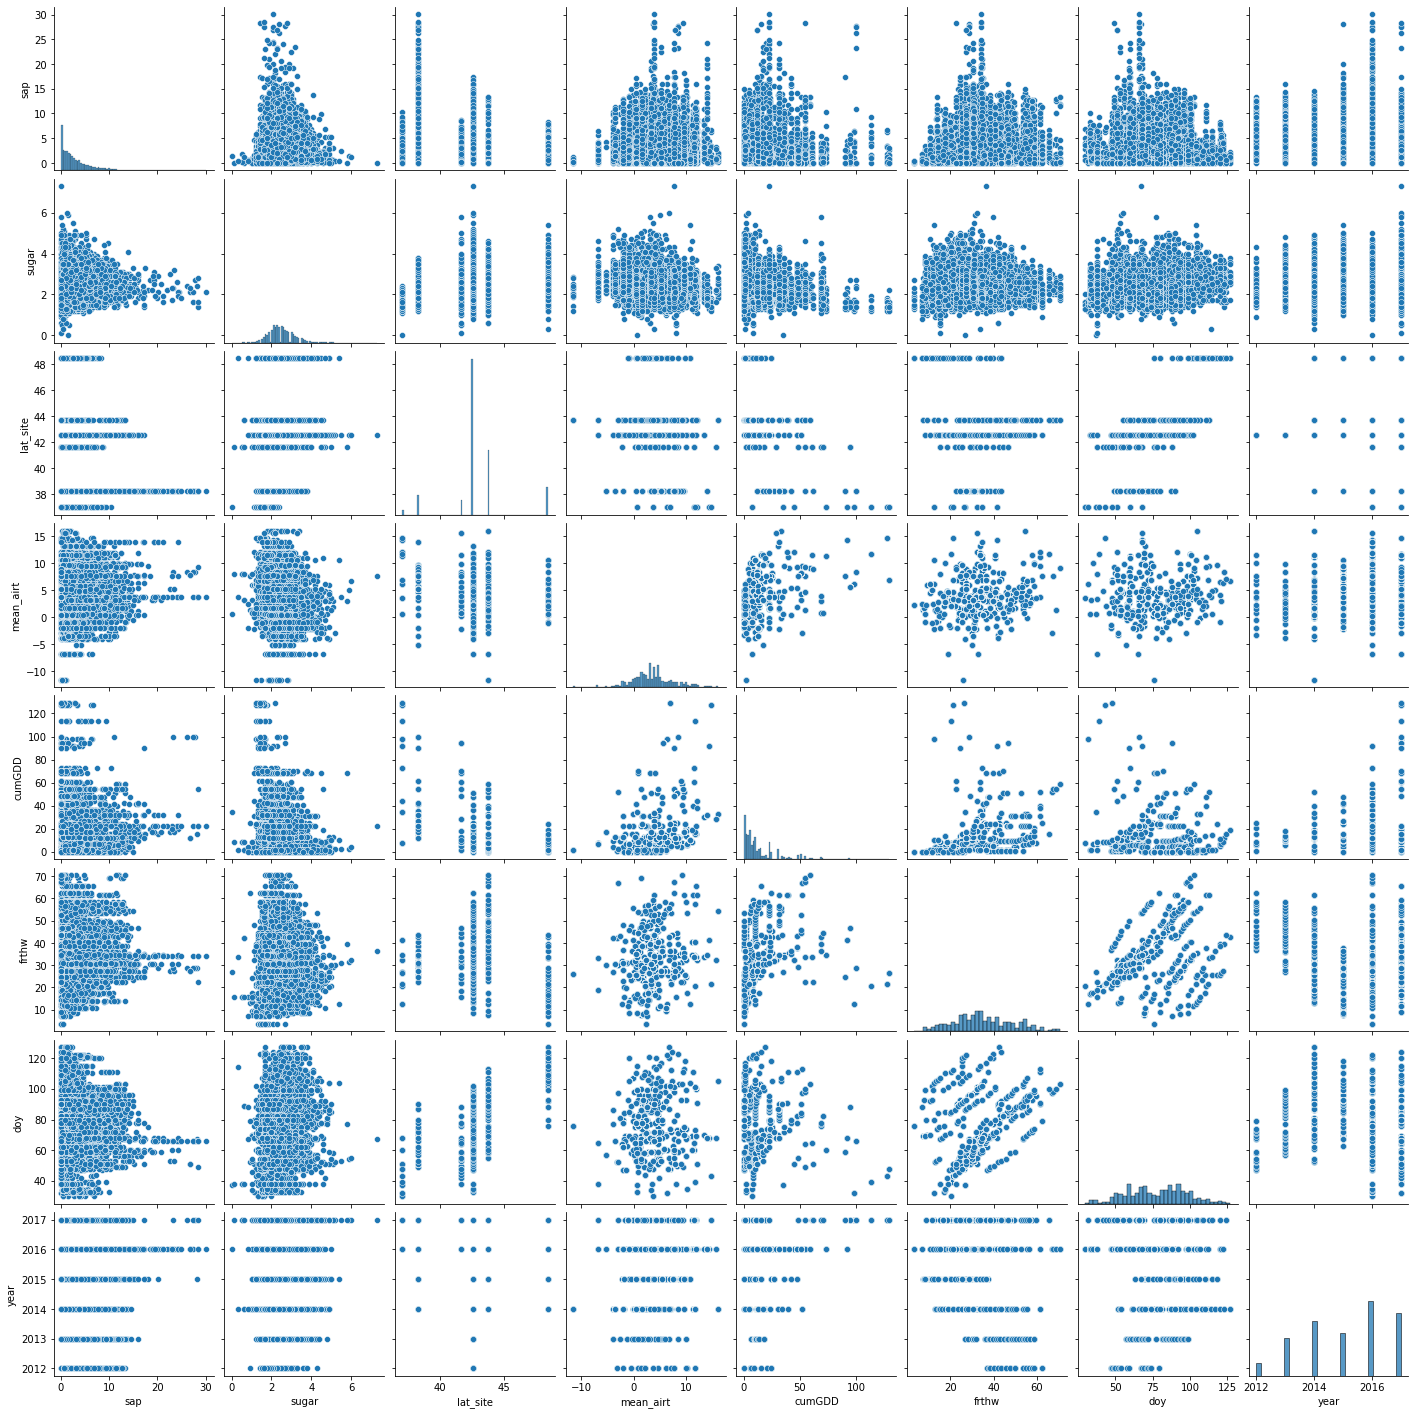

In [79]:
foi_pairplot = foi[
    [
        "tap_id",
        "sap",
        "sugar",
        "lat_site",
        "mean_airt",
        "cumGDD",
        "frthw",
        "doy",
        "year",
    ]
]
sns.pairplot(foi_pairplot);